Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
import numpy as np

def engineerFeatures(df):
    
    df["date_recorded_datetime"] = pd.to_datetime(df["date_recorded"])

    df["date_recorded_epoch"] = df["date_recorded_datetime"].astype(np.int64)
    df["date_recorded_month"] = df["date_recorded_datetime"].apply(lambda x: x.month)
    df["date_recorded_year"] = df["date_recorded_datetime"].apply(lambda x: x.year).astype(np.object)

    df["construction_year_na"] = (df["construction_year"] == 0).apply(lambda x: 1 if x else 0)

    df["age"] = df["date_recorded_year"] - df["construction_year"].apply(lambda x: x if x > 0 else 3000)
    df["age"] = df["age"].apply(lambda x: x if x > 0 else df["age"].median())

    df["nan_count"] = df.replace({"unknown", np.NaN}).isnull().sum(axis=1)


engineerFeatures(train)
engineerFeatures(test)

In [0]:
# re-import everything so we have it in one place
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest

from matplotlib import pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score


target = "status_group"
"""
"funder",
"recorded_by",
"ward",
"wpt_name",
"subvillage",
"scheme_name",
"lga",
"installer",
"""
bad_cols = [
    "id",
    "scheme_name",
    "date_recorded",
    "date_recorded_datetime",
    "construction_year",
    "management_group",
    "payment_type",
    "quantity_group",
    "source_type",
    "waterpoint_type_group",
    "extraction_type_group",
    "extraction_type_class",
    "region_code",
    "district_code",
    "wpt_name",
    "management",
]

features = train.columns.drop([target] + bad_cols)

def runPredictions():
    """
        Split the data, make a pipeline, fit the pipeline,
        make predictions, print the feature importance

        @returns: pipeline
    """
    global train, features, score, X_val, y_val

    # split data
    trn, val = train_test_split(train)

    X_train = trn[features]
    y_train = trn[target]

    X_val = val[features]
    y_val = val[target]

    # make the pipeline
    pipeline = make_pipeline(
        ce.OrdinalEncoder(),
        SimpleImputer(strategy="median"),
        StandardScaler(),
        RandomForestClassifier(random_state=511, n_jobs=-1, n_estimators=120),
    )

    pipeline.fit(X_train, y_train)

    # make predictions
    y_pred = pipeline.predict(X_val)
    score = accuracy_score(y_pred, y_val)
    print(f"""
        Model accuracy score: {score}
    """)

    # make visualizations
    model = pipeline.named_steps["randomforestclassifier"]
    encoder = pipeline.named_steps["ordinalencoder"]
    encoded_cols = encoder.transform(X_val).columns
    importances = pd.Series(model.feature_importances_, encoded_cols)

    fig, ax = plt.subplots(figsize=(10, 40))
    importances.sort_values().plot.barh(color="gray", ax=ax)
    fig.show()

    return pipeline


        Model accuracy score: 0.8025589225589226
    


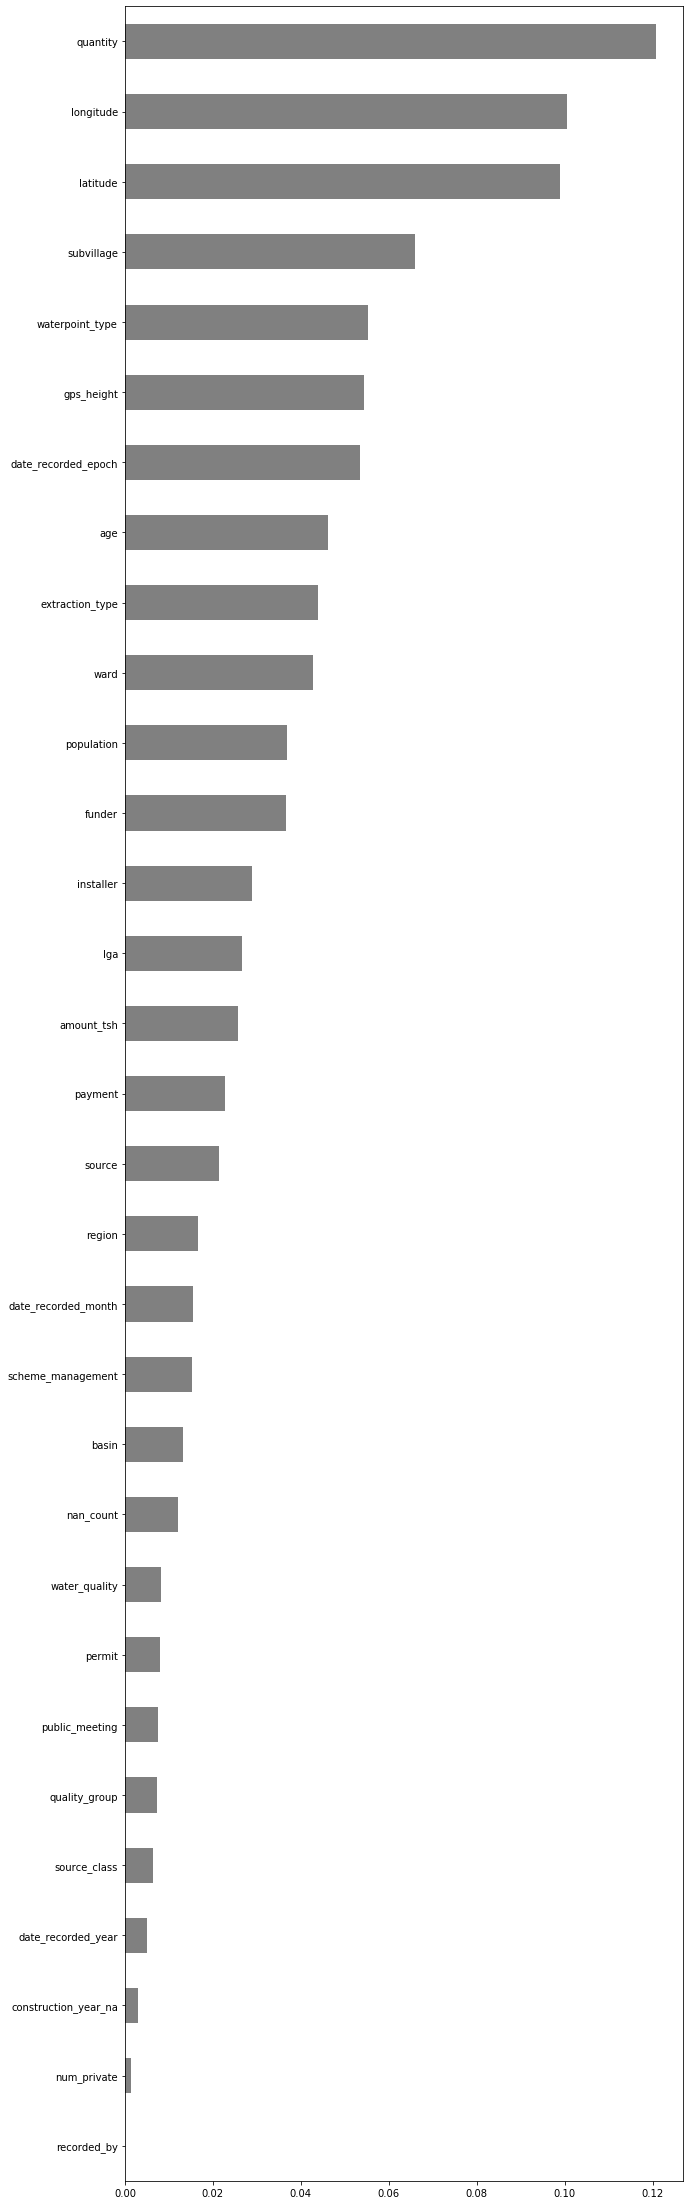

In [62]:
pipeline = runPredictions()

In [0]:
res = pipeline.predict(test[features])
y_pred_df = pd.DataFrame(data={"status_group": res}, index=test["id"])
y_pred_df.to_csv("y_pred.csv")

In [52]:
train["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [58]:
df = train.replace({"functional": 0, "functional needs repair": 1, "non functional": 2})
df.corr(method="spearman")["status_group"].abs().sort_values()

longitude               0.000393
id                      0.004062
date_recorded_month     0.004094
num_private             0.014782
latitude                0.016346
district_code           0.019821
date_recorded_epoch     0.020108
population              0.024093
date_recorded_year      0.024945
construction_year_na    0.042341
nan_count               0.056284
region_code             0.079016
gps_height              0.099470
construction_year       0.157228
age                     0.163019
amount_tsh              0.222641
status_group            1.000000
Name: status_group, dtype: float64

In [54]:
help(df.corr)

Help on method corr in module pandas.core.frame:

corr(method='pearson', min_periods=1) method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior
            .. versionadded:: 0.24.0
    
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correlation.
    
    Returns
    -------
    DataFrame
        

In [66]:
# in a seperate notebook I had run some randomized tests. The results show which features yield the highest score.
results_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Kaggle-Challenge/master/module2/results.csv")

from plotly import express as px

fig = px.box(data_frame=results_df, x="feature", y="score")
fig.show()